# UCI Evaluation Report: NIH Loan Repayment Workshop

The Institute of Clinical and Translational Science (ICTS) hosted a workshop focused on the NIH Loan Repayment Program (LRP) for early career researchers at UCI, post-doctoral fellows, and junior faculty. The session provided an overview of the LRP and guidance on preparing an application. An evaluation survey was given after the workshop was completed and received 13 responses from participants. Overall, survey results show high satisfaction with the workshop and strong understanding of the NIH LRP application process.

## Initializing and Preparing Data

In [100]:
import pandas as pd
import numpy as np
import textwrap
from matplotlib import pyplot as plt
import seaborn as sns


In [101]:
data = pd.read_csv('/Users/sarachong/Downloads/TEMPLATECOPYNIHLoanR_DATA_2026-01-13- RAW Data.csv')
data = data.drop(columns=['loan_repayment_workshop_complete', 'record_id']); data.head()

,uci_affiliation,uci_affiliation_other,uci_department,loan_process,necessary_tools,enjoyed,relevant,organized,length,valuable,implement_workshop,strategies,use_info_learned_workshop,impression_workshop,suggestions_workshop
0,2,NaN,Social Ecology,6,5,7,6,6,7,7,5,6,I will likely apply next year this will help m...,it was very accessible and welcoming,not at the moment perhaps as I apply.
1,1,NaN,Medicine,5,6,7,7,7,7,7,5,7,NaN,NaN,NaN
2,4,Post doc,Biomedical Engineering,7,7,7,7,7,7,7,7,7,I will evaluate my options for applying to thi...,The workshop is a great resource for the UCI r...,NaN
3,4,Postdoc,Otolaryngology-Head and Neck Surgery,6,6,5,5,6,7,6,6,6,NaN,NaN,NaN
4,4,Administrative Staff,ICTS,7,7,7,7,7,7,7,7,7,NaN,NaN,NaN


In [102]:
data = data.replace('.', np.nan)
data = data.replace('Post doc', 'Postdoc')
change = ['length', 'valuable', 'implement_workshop', 'strategies']
for i in change:
    data[i] = pd.to_numeric(data[i], errors='coerce')
    data[i] = data[i].fillna(round(data[i].mean()))
    data[i] = data[i].astype(int)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   uci_affiliation            13 non-null     int64 
 1   uci_affiliation_other      3 non-null      object
 2   uci_department             13 non-null     object
 3   loan_process               13 non-null     int64 
 4   necessary_tools            13 non-null     int64 
 5   enjoyed                    13 non-null     int64 
 6   relevant                   13 non-null     int64 
 7   organized                  13 non-null     int64 
 8   length                     13 non-null     int64 
 9   valuable                   13 non-null     int64 
 10  implement_workshop         13 non-null     int64 
 11  strategies                 13 non-null     int64 
 12  use_info_learned_workshop  4 non-null      object
 13  impression_workshop        4 non-null      object
 14  suggestions_

To start, I cleaned the data to ensure it is ready for evaluation. Because the dataset is fairly small, it is easy to identify any changes needed to be made. First, I removed two columns that were not necessary for the analysis: the `loan_repayment_workshop_complete` column and the `record_id` column, since these variables do not have meaningful insights into workshop effectiveness or participant feedback. Next, I addressed missing data by identifying unfilled survey responses and filling these missing values with the average response for each respective question, rounded to the nearest whole number. This helps keeps all survey answers while maintaining the rating scales. Finally, I verified that all variables had the correct data types. With these data cleaning steps completed, the dataset is now ready for analysis of the NIH Loan Repayment Program workshop evaluation.

## Analyzing the Data

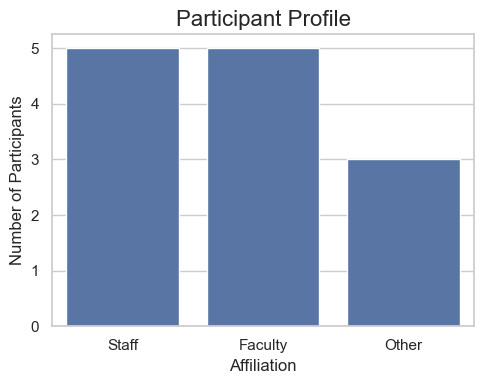

Departments:
 Social Ecology, Medicine, Biomedical Engineering, Otolaryngology-Head and Neck Surgery, ICTS, Stem Cell, COHS, School of Nursing, Public Health, Psychiatry and Human Behavior , Psychiatry, School of Nursing, Molecular Biology & Biochemistry


In [104]:
affiliation_dict = {1: 'Faculty', 2: 'Staff', 3:'Student', 4:'Other'}
data['affiliation'] = data['uci_affiliation'].map(affiliation_dict)
affiliation = data['affiliation'].value_counts().reset_index()
affiliation.columns = ['Affiliation', 'Count']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(5,4))
barplot = sns.barplot(data=affiliation, x='Affiliation', y='Count')

plt.title('Participant Profile', fontsize=16)
plt.xlabel('Affiliation', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)

plt.tight_layout()
plt.show()

print("Departments:\n",", ".join(data['uci_department'].dropna().astype(str)))

To begin the analysis, the workshop had a diverse 13 participants, coming from multiple departments such as Medicine, Nursing, and Biomedical Engineering. As represented in the graph, all hold professional roles, with no student participants included in the dataset.

In [105]:
scale = {3: 'Slightly Disagree', 4: 'Neutral', 5:'Slightly Agree', 6:'Agree', 7:'Strongly Agree'}
order = ['Slightly Disagree', 'Neutral', 'Slightly Agree', 'Agree', 'Strongly Agree']

learning = {'loan_process': 'I understand the basic process of submitting an NIH Loan Repayment application.', 
            'necessary_tools': 'I now know how to access the tools necessary to develop an NIH Loan Repayment application.'}
quality = {'enjoyed': 'I enjoyed the workshop.',
           'length': 'The workshop was an appropriate length.',
           'relevant': 'The content was relevant to me.',
           'valuable': 'The material covered in this workshop was valuable.',
           'organized': 'The content was organized well and easy to follow.'}
implement = {'implement_workshop': 'I feel capable to implement the workshop material.',
             'strategies': 'I intend to use the strategies I learned in this workshop.'}

In [106]:
def multi_plots(rating, length, color):
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, length, figsize=(12,5), sharey=True)

    for i, j in enumerate(rating):
        data[j] = data[j].map(scale)
        frame = data[j].value_counts().reindex(order, fill_value=0).reset_index()
        frame.columns = ['Scale', 'Count']
        
        sns.barplot(data=frame, x='Scale', y='Count', ax=axes[i], color=color)
        
        title = rating.get(j)
        wrapped_title = "\n".join(textwrap.wrap(title, 45))
        axes[i].set_title(wrapped_title, fontsize=14)
        axes[i].set_xlabel('Response')
        if i == 0:
            axes[i].set_ylabel('Number of Participants')

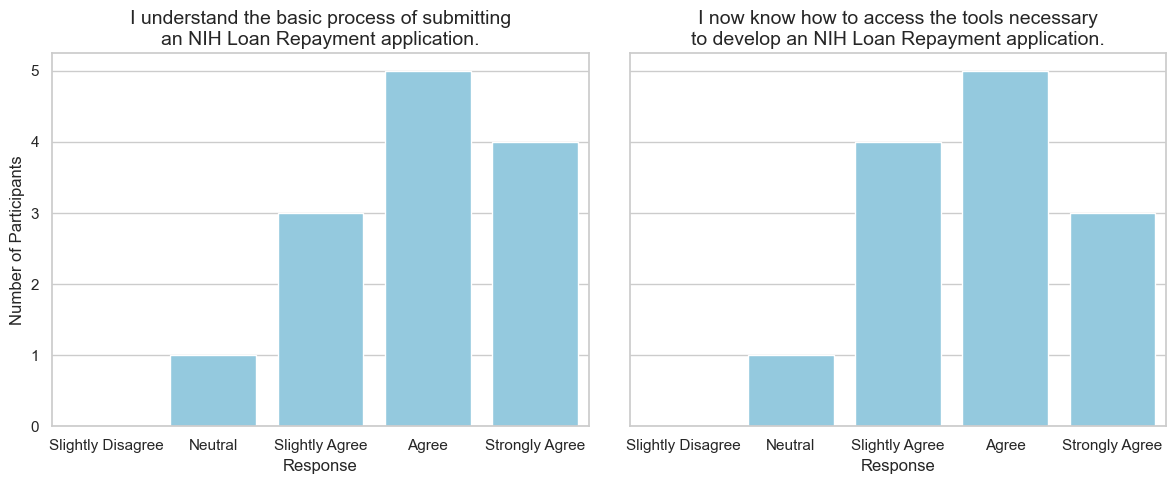

In [107]:
multi_plots(learning, 2, 'skyblue')
plt.tight_layout()
plt.show()

These two graphs highlight how well the material was learned in the workshop. The results show that participants left with a strong understanding of both the NIH Loan Repayment application process and the tools needed to develop an application. For both understanding the basic submission process and knowing how to access the necessary tools, the majority of responses clustered around “Agree” and “Strongly Agree,” with only a small number of neutral responses and no disagreement. This suggests the workshop met its learning objectives by increasing participants’ preparedness to pursue an NIH Loan Repayment application.

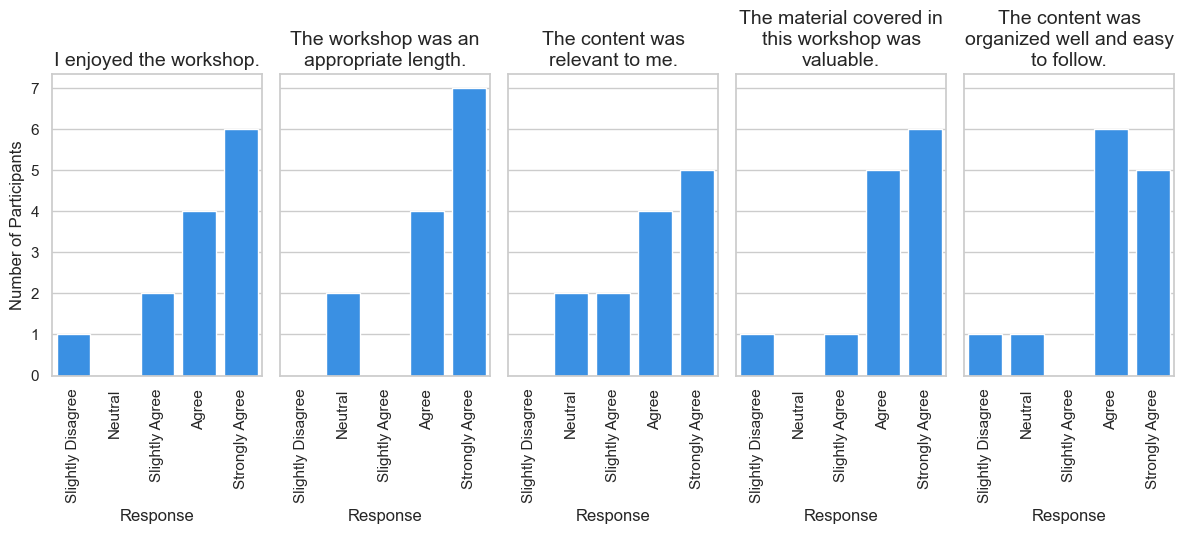

In [108]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 5, figsize=(12,5.5), sharey=True)

for i, j in enumerate(quality):
    data[j] = data[j].map(scale)
    frame = data[j].value_counts().reindex(order, fill_value=0).reset_index()
    frame.columns = ['Scale', 'Count']
    
    sns.barplot(data=frame, x='Scale', y='Count', ax=axes[i], color='dodgerblue')
    
    axes[i].tick_params(axis='x', rotation=90)
    title = quality.get(j)
    wrapped_title = "\n".join(textwrap.wrap(title, 23))
    axes[i].set_title(wrapped_title, fontsize=14)
    axes[i].set_xlabel('Response')
    if i == 0:
        axes[i].set_ylabel('Number of Participants')


plt.tight_layout()
plt.show()

These survey results show very positive participant perceptions in regards to the workshop quality. Most respondents agreed or strongly agreed that they enjoyed the workshop, found the length appropriate, and felt the content was relevant to their needs. Specifially, ratings were very strong for the value of the material and the organization of the content, with the majority of participants stating that the workshop was well structured and easy to follow. Only a small number of neutral or slightly disagree responses appeared in graphs, suggesting a slight improvement needed to be made. Overall, these findings show that the workshop was well received, organized, and successful in teaching relevant content.

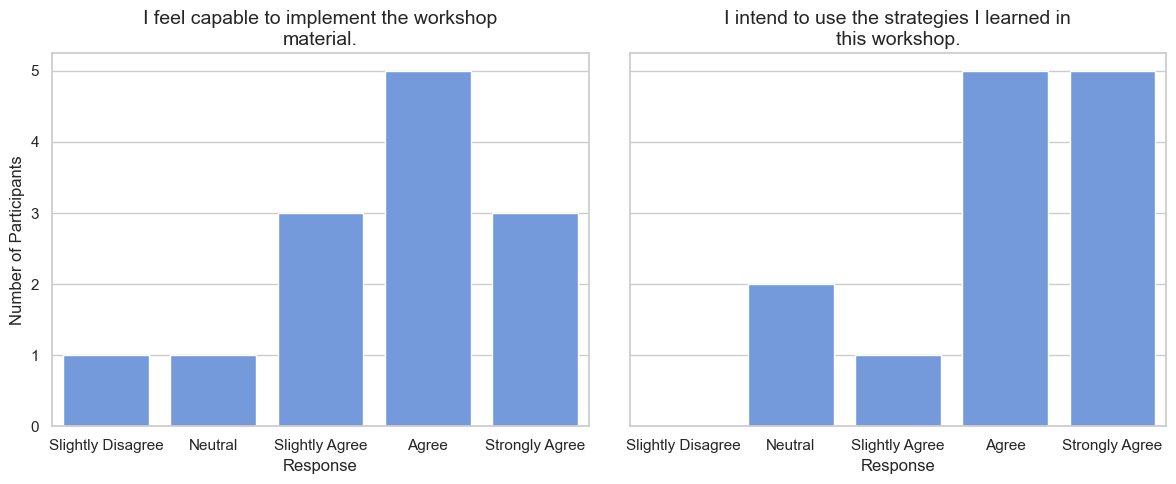

In [109]:
multi_plots(implement, 2, 'cornflowerblue')
plt.tight_layout()
plt.show()


The graphs results show that participants largely felt confident in their ability to apply what they learned and intended to use the strategies taught in the workshop. Most respondents agreed or strongly agreed that they felt capable of implementing the workshop material, with only a small number expressing neutral or slight disagreement. Intent to use the strategies learned was even higher, with many responses agreeing and strongly agreeing and having a small amount neutral responses. Overall, these findings tell us that the workshop was effective in building understanding and motivating participants to apply the knowledge and strategies on their own.

| Comments  | Responses                                                |  
|-----------|----------------------------------------------|  
| How will use the information that you learned today?  | - I will likely apply next year this will help me develop my research trajectory. <br> - I will evaluate my options for applying to this program and potentially develop a grant application using the information provided. <br> - I probably won't--the only thing I learned was that LRP does not have to go through SPA. <br> to apply to LRP|  
| What was your overall impression of the workshop?  | - It was very accessible and welcoming <br> - The workshop is a great resource for the UCI research community. <br> - Poorly organized and the speakers were not prepped. No real flow of information or substantive strategies for applying. <br> - Very well done; really liked that you had a panel of previous recipients|  
| Do you have any suggestions for improvement?    | - Not at the moment perhaps as I apply. <br> - Instead of relying on random people who have had a LRP grant, bring in people who truly understand the various pieces of the application to provide strategies and offer assistance with different types of research. |  


Lastly, the feedback shows a mix of positive reactions and areas for improvement. Only a few comments were given, but the general opinion found the workshop welcoming and easy to follow, believing it was a helpful resource for the UCI research community. One attendee said the information would help them think about applying in the future, while another felt the material was not that detailed. Suggestions for improvement focused on bringing in presenters with more direct expertise in the application process who could offer clearer strategies and hands-on support for different types of research.

## Insights and Feedback

In conclusion, the results show that the workshop was effective and positively received, with responses mainly in the “Agree” and “Strongly Agree” categories and no participants having strong disagreement on any survey question. Participants had a solid understanding of the NIH Loan Repayment application process, felt confident applying what they learned, and intended to use the strategies discussed. The workshop was viewed as relevant, well organized, and appropriately timed. While feedback was mostly positive, some neutral comments suggest that future workshops could be improved by providing more detailed content and involving presenters with deeper knowledge on the application process.